In [37]:
#!pip install opencv-python
#!python -m pip install tensorflow==2.5.0
#pip install --user --upgrade pip
#!pip install opencv-contrib-python --user
#!pip install opencv-python
#!pip install playsound
#!pip install secure-smtplib
# !pip install mlxtend

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import PIL
import random
import tensorflow as tf
import pickle
import time
import sklearn.metrics 
import seaborn as sns
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import TensorBoard
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from tqdm import tqdm

In [39]:
DATADIR = "dataset/train_fire_and_nofire/"
CATEGORIES = ["Fire", "Normal"]
IMG_SIZE = 150

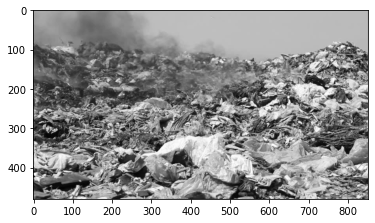

In [40]:
for category in CATEGORIES: 
    path = os.path.join(DATADIR,category)  
    for img in os.listdir(path): 
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE) 
        plt.imshow(img_array, cmap='gray') 
        plt.show()
        break 
    break

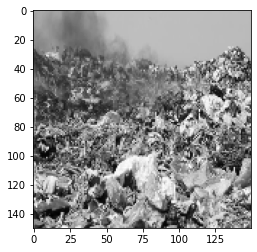

In [41]:
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show() 

In [42]:
training_data = []
def create_training_data():
    for category in CATEGORIES:  
        path = os.path.join(DATADIR,category)
        class_num = CATEGORIES.index(category) 
        for img in tqdm(os.listdir(path)):
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  
                training_data.append([new_array, class_num]) 
            except Exception as e: 
                pass
create_training_data()

100%|████████████████████████████████████████████████████████████████████████████████| 499/499 [00:07<00:00, 64.21it/s]


In [43]:
print(len(training_data))

1000


In [44]:
random.shuffle(training_data)

In [45]:
x = []
y = []

In [46]:
for features,label in training_data:
    x.append(features)
    y.append(label)

print(x[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

x = np.array(x).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y = np.array(y)

[[[[158]
   [251]
   [210]
   ...
   [ 89]
   [ 96]
   [ 93]]

  [[138]
   [239]
   [254]
   ...
   [ 94]
   [ 90]
   [ 93]]

  [[120]
   [221]
   [254]
   ...
   [ 89]
   [ 87]
   [ 98]]

  ...

  [[146]
   [186]
   [142]
   ...
   [140]
   [114]
   [133]]

  [[130]
   [135]
   [138]
   ...
   [186]
   [172]
   [150]]

  [[135]
   [125]
   [135]
   ...
   [151]
   [145]
   [147]]]]


In [47]:
x= x/255.0

In [48]:
# Initializing CNN
model=tf.keras.models.Sequential()

# adding first layer
model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=x.shape[1:]))
# model.add(tf.keras.layers.MaxPool2D(pool_size=2))

# adding second layer
model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
# model.add(tf.keras.layers.MaxPool2D(pool_size=2))

# adding third layer
model.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2))

# Flattening
model.add(tf.keras.layers.Flatten())

# Fully connected layer
model.add(tf.keras.layers.Dense(units=128,activation='relu'))
model.add(Dropout(0.5))

# Output layers
model.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

In [49]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 150, 150, 32)      320       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 150, 150, 64)      18496     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 150, 150, 128)     73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 75, 75, 128)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 720000)            0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               92160128  
_________________________________________________________________
dropout (Dropout)            (None, 128)              

In [50]:
tensorboard = TensorBoard(log_dir="logs/{}".format("FireCNN"))

In [51]:
 model.compile(loss='binary_crossentropy',
                          optimizer='adam',
                          metrics=['accuracy'],
                          )

In [52]:
 model.fit(x, y,batch_size=32,epochs=10,validation_split=0.2,callbacks=[tensorboard])

Epoch 1/10
25/25 [==============================] - 532s 21s/step - loss: 1.2194 - accuracy: 0.6488 - val_loss: 0.5732 - val_accuracy: 0.7200
Epoch 2/10
25/25 [==============================] - 495s 20s/step - loss: 0.4681 - accuracy: 0.8062 - val_loss: 0.4336 - val_accuracy: 0.8150
Epoch 3/10
25/25 [==============================] - 492s 20s/step - loss: 0.3820 - accuracy: 0.8475 - val_loss: 0.4160 - val_accuracy: 0.8200
Epoch 4/10
25/25 [==============================] - 1132s 46s/step - loss: 0.2929 - accuracy: 0.9025 - val_loss: 0.4250 - val_accuracy: 0.8200
Epoch 5/10
25/25 [==============================] - 535s 21s/step - loss: 0.1988 - accuracy: 0.9375 - val_loss: 0.6342 - val_accuracy: 0.8150
Epoch 6/10
25/25 [==============================] - 664s 27s/step - loss: 0.1231 - accuracy: 0.9712 - val_loss: 0.7681 - val_accuracy: 0.7650
Epoch 7/10
25/25 [==============================] - 1633s 66s/step - loss: 0.0752 - accuracy: 0.9762 - val_loss: 0.6760 - val_accuracy: 0.7950
Epoc

In [53]:
model.save('fire_normal_model/64x3-CNN.model')

INFO:tensorflow:Assets written to: fire_normal_model/64x3-CNN.model\assets


Text(0.5, 1.0, 'Loss Curves')

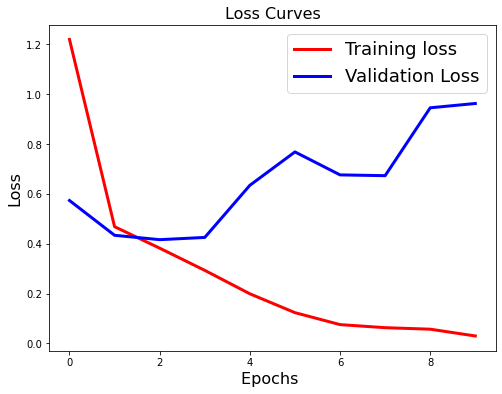

In [54]:
# Training and validation loss curve
plt.figure(figsize=[8,6])
plt.plot(model.history.history['loss'],'r',linewidth=3.0)
plt.plot(model.history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

Text(0.5, 1.0, 'Accuracy Curves')

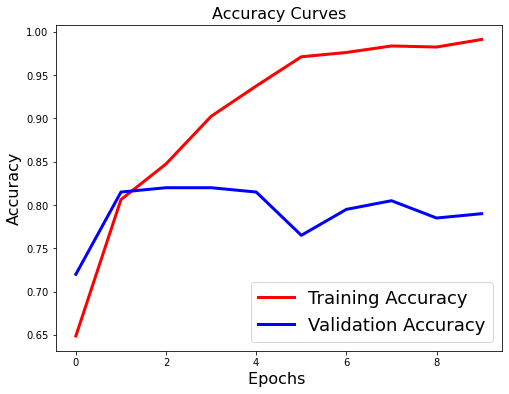

In [55]:
# Training and validation accuracy curve
plt.figure(figsize=[8,6])
plt.plot(model.history.history['accuracy'],'r',linewidth=3.0)
plt.plot(model.history.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

In [58]:
pred = model.predict(x)

In [57]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 0, stratify = y)
x_pred = model.predict_classes(x_test)
y_pred = model.predict_classes(x_test)

KeyboardInterrupt: 

In [22]:
conf = confusion_matrix(y_test,y_pred)

<AxesSubplot:>

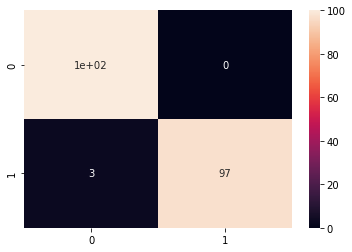

In [23]:
sns.heatmap(conf, annot=True)

In [24]:
acc = (conf[0][0] + conf[-1][-1]) / np.sum(conf)
print(acc)

0.985


In [25]:
acc = sklearn.metrics.accuracy_score(y, np.round(abs(pred)), normalize=False) 
print(acc)

962


In [26]:
precision = sklearn.metrics.precision_score(y, np.round(abs(pred)), pos_label=0)
print(precision)

0.9620758483033932


In [27]:
recall = sklearn.metrics.recall_score(y, np.round(abs(pred)), pos_label=1)
print(recall)

0.9619238476953907


In [28]:
def prepare( ):
    IMG_SIZE = 150  
    img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)  # read in the image, convert to grayscale
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize image to match model's expected sizing
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [29]:
model = tf.keras.models.load_model("fire_normal_model/64x3-CNN.model")

In [30]:
image_for_testing=r'dataset/test_fire_and_nofire/normal/gari.jpg'

In [31]:
prediction = model.predict([prepare(image_for_testing)])

TypeError: prepare() takes 0 positional arguments but 1 was given

In [ ]:
image_show=PIL.Image.open(image_for_testing)
plt.imshow(image_show)

plt.title(CATEGORIES[int(prediction[0][0])])
plt.show()